In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

In [76]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['class']=data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [77]:
class SVM:
    def __init__(self,rate=0.001,epoch=100,random_state=0):
        self.rate = rate
        self.epoch = epoch
        self.random_state = random_state
        
    def fit(self,X,y):
        self.num_samples=X.shape[0]
        self.num_features=X.shape[1]
        
        self.w=np.zeros(self.num_features) #特徴量の種類、次元
        self.b=0
        
        rand_gen=np.random.RandomState(self.random_state)
        self.alpha=rand_gen.normal(loc=0.0,scale=0.01,size=self.num_samples) #未定乗数を初期化
        
        for _ in range(self.epoch):
            self.cycle(X,y) #epoch数だけ降下法をおこなう
            
        index=[i for i in range(self.num_samples) if self.alpha[i]!=0] #サポートベクターを取得している
        
        for i in index:
            self.w+=self.alpha[i]*y[i]*X[i]
            
        for i in index:
            self.b+=y[i]-(X[i]@self.w)
            
        self.b/=len(index)#インデックスは平均を用いる
        
    def cycle(self,X,y):
        y=y.reshape([-1,1])
        H=(y@y.T)*(X@X.T)
        grad=np.ones(self.num_samples)-H@self.alpha
        self.alpha+=self.rate*grad
        self.alpha=np.where(self.alpha<0,0,self.alpha)#未定乗数は０以上

In [78]:
df=df[df['class']!=2]#二値分類にするために二種類だけ取り出す
df=df[['petal length (cm)','petal width (cm)','class']]
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y=np.where(y==0,-1,1)

sc=StandardScaler()
X_std=sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=0,stratify=y)

In [79]:
svm=SVM()
svm.fit(X_train,y_train)

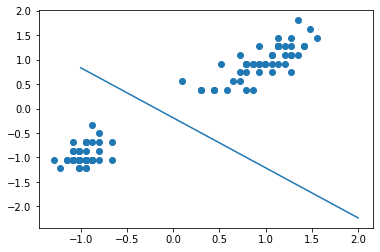

In [80]:
plt.scatter(X_std[:,0],X_std[:,1],marker="o")
x1=np.linspace(-1,2,1000)

w1=svm.w[0]
w2=svm.w[1]
b=svm.b

x2=-(w1*x1+b)/w2

plt.plot(x1,x2)
plt.show()

In [90]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['class']=data.target


df=df[df['class']!=2]#二値分類にするために二種類だけ取り出す
df=df[['sepal length (cm)','sepal width (cm)','class']]
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y=np.where(y==0,-1,1)

sc=StandardScaler()
X_std=sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=0,stratify=y)

svm=SVM()
svm.fit(X_train,y_train)

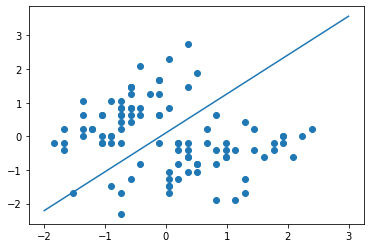

In [91]:
plt.scatter(X_std[:,0],X_std[:,1],marker="o")
x1=np.linspace(-2,3,1000)

w1=svm.w[0]
w2=svm.w[1]
b=svm.b

x2=-(w1*x1+b)/w2

plt.plot(x1,x2)
plt.show()